# World Happiness Report 

## Introduction 
As per a global civilization, we are awakening to realization of just how much happiness in our day-to-day lives really matters. The psitive effects of a happy mind not only prioagate throughout the various dimensions of a person's life, but they furthermore ripple throughout society in stone-in-the-pond fashion. Corporations, governments and organizations are becoming increasingly aware that its employees, citizens and members are better able to contribute to their respective tasks when minimum happiness levels are met, and that it is therefore in their best interests to contribute to the well-beings of these people. As a result, happiness metrics are becoming increasingly utilized in making policy decsions - a win for everyone.

In 2012 the first iteration of the World Happiness Report was produced, a survey that looks at nationally representative happiness levels across contries as a measure of national progress. It was an impressive feat that required the contributions of leading experts in fields such as economics, health, psychology, statistics and public policy, among many others. To evaluate happiness levels, the report used surveys provided by the Gallup World Poll. The poll furthermore includes geographical data and data for six characteristics that are hypothesized to be correlated with national happiness levels, it is these features and how they relate to happiness that will be the main focus of this project. Since 2012 a new updated report has been published each year excluding 2014, and in this project we will look specifically at the years 2015-2017.

# The Six Characteristics (at the level of countries)

1. GDP per capita
2. Family quality
3. Health
4. Freedom
5. Generosity of citizens
6. Trust in government

# The Target Variable (at the level of countries)

> The mean happiness score of each country

In [1]:
# let's importing the required libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [23]:
# print the shape of the dataset
df.shape

(158, 12)

In [25]:
# How many missing values are in each column and of what data types they are?

print(); print("Database has {} observations (instances) and {} columns (attributes).".format(df.shape[0],df.shape[1]))
print(); print("Missing values in each column:\n{}".format(df.isnull().sum()))
print(); print("Columns data types:\n{}".format(df.dtypes))


Database has 158 observations (instances) and 12 columns (attributes).

Missing values in each column:
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Columns data types:
Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                      

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Data Analysis and Data Visualisation

In [27]:
# Highlighting the maximum values of each attribute in the data set

def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
df.style.apply(highlight_max)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587000,0.034110,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380
1,Iceland,Western Europe,2,7.561000,0.048840,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010
2,Denmark,Western Europe,3,7.527000,0.033280,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040
3,Norway,Western Europe,4,7.522000,0.038800,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310
4,Canada,North America,5,7.427000,0.035530,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760
5,Finland,Western Europe,6,7.406000,0.031400,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2.619550
6,Netherlands,Western Europe,7,7.378000,0.027990,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,2.465700
7,Sweden,Western Europe,8,7.364000,0.031570,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,2.371190
8,New Zealand,Australia and New Zealand,9,7.286000,0.033710,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2.264250
9,Australia,Australia and New Zealand,10,7.284000,0.040830,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2.266460


<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

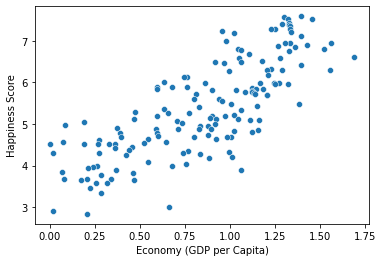

In [36]:
# visualise data using scatterplot
sns.scatterplot(x="Economy (GDP per Capita)",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

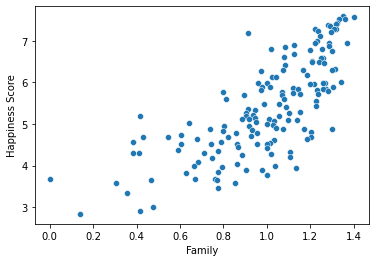

In [37]:
sns.scatterplot(x="Family",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

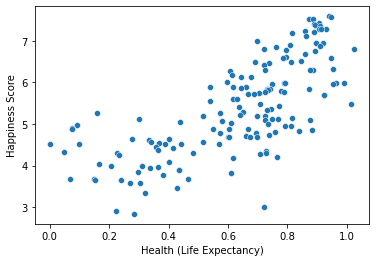

In [41]:
sns.scatterplot(x="Health (Life Expectancy)",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

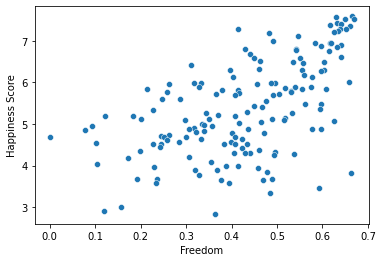

In [42]:
sns.scatterplot(x="Freedom",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

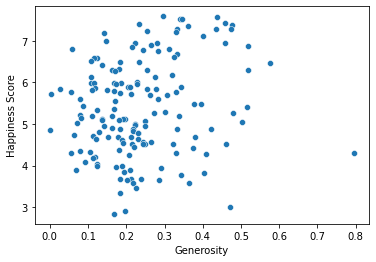

In [43]:
sns.scatterplot(x="Generosity",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

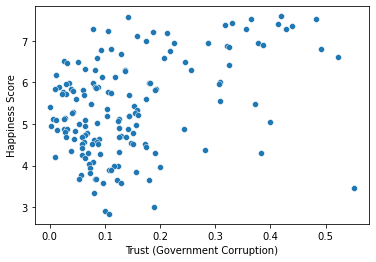

In [44]:
sns.scatterplot(x="Trust (Government Corruption)",y="Happiness Score",data=df)

# Top 10 countries for each attribute

<AxesSubplot:xlabel='Freedom', ylabel='Country'>

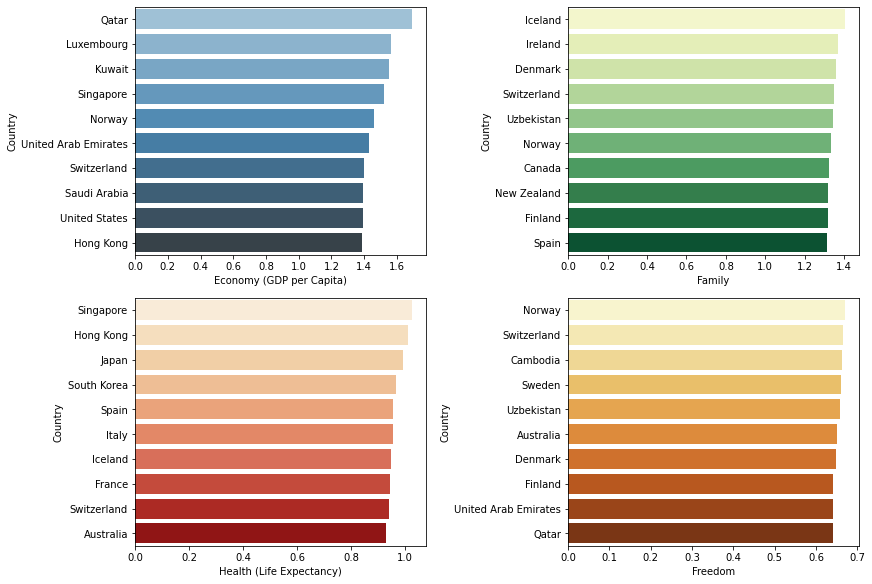

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x ='Economy (GDP per Capita)', y='Country', 
            data = df.nlargest(10,'Economy (GDP per Capita)'), ax=axes[0,0], palette="Blues_d")

sns.barplot(x='Family', y='Country',
            data = df.nlargest(10,'Family'), ax=axes[0,1], palette="YlGn")

sns.barplot(x='Health (Life Expectancy)', y='Country',
            data = df.nlargest(10,'Health (Life Expectancy)'), ax=axes[1,0], palette='OrRd')

sns.barplot(x='Freedom', y='Country', 
            data = df.nlargest(10,'Freedom'), ax=axes[1,1], palette='YlOrBr')

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Country'>

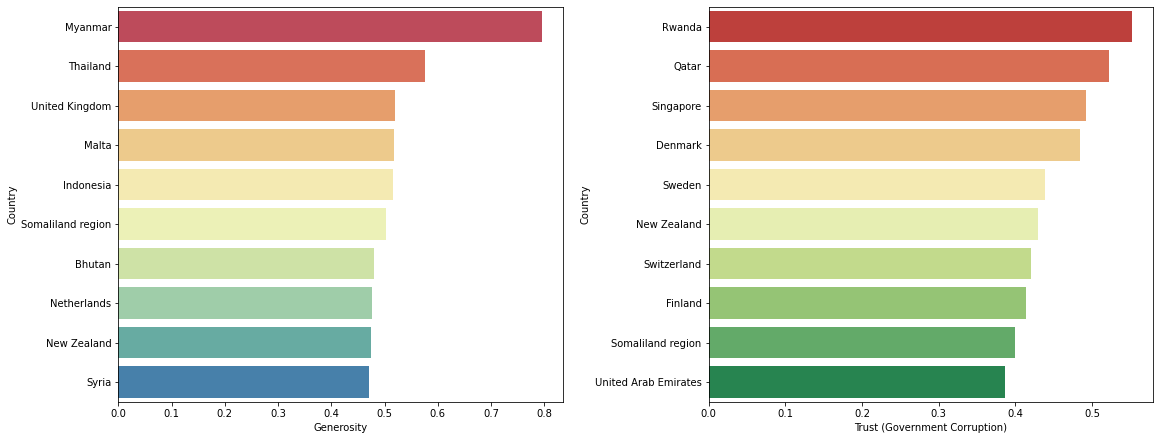

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(16,6))

sns.barplot(x='Generosity', y='Country', 
            data = df.nlargest(10,'Generosity'), ax=axes[0], palette='Spectral')

sns.barplot(x='Trust (Government Corruption)', y='Country',
            data = df.nlargest(10,'Trust (Government Corruption)'), ax=axes[1], palette='RdYlGn')

# Correlation

In [45]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

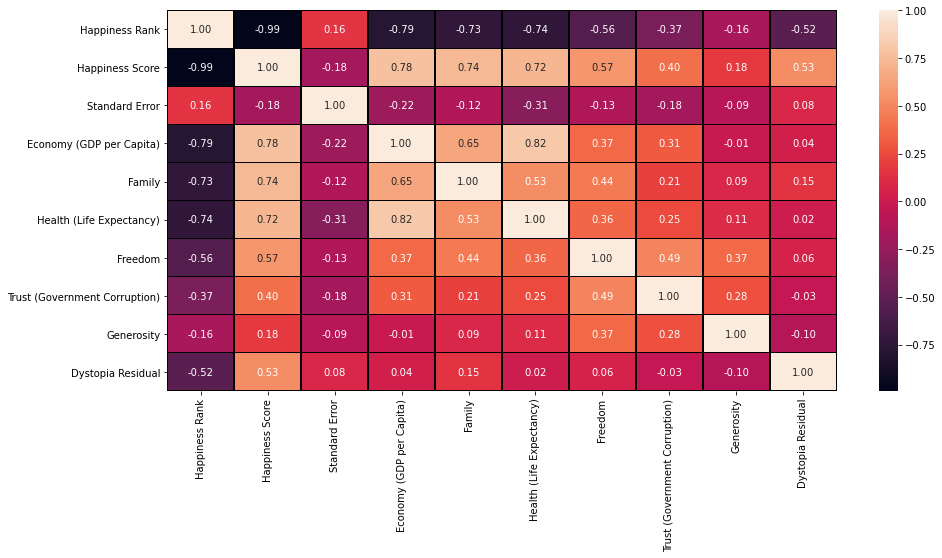

In [46]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

# Dystopia Residual of Correlation:

All the six charactistics columns of the datasets is positibely correlated with the target column.

GDP per Capita has 4 percent correlation with the target column which can be considered as a good bond. Family has 15 percent correlation with the target column which can be considered as a strong bond. Health has 2 percent correlation with the target column which can be considered as a weak bond. Freedom has 6 percent correlation with the target column can be considered as a good bond. Trut has 0.3 percent correlation with the target column can be considered as a verry weak bond. Generosity has 0.10 percent correlation with the target column can be considered as a verry weak bond.

Max Correlation = Family

Min Correlation = Generosity

In [49]:
# Descriptive statistics of dataset
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<function matplotlib.pyplot.show(close=None, block=None)>

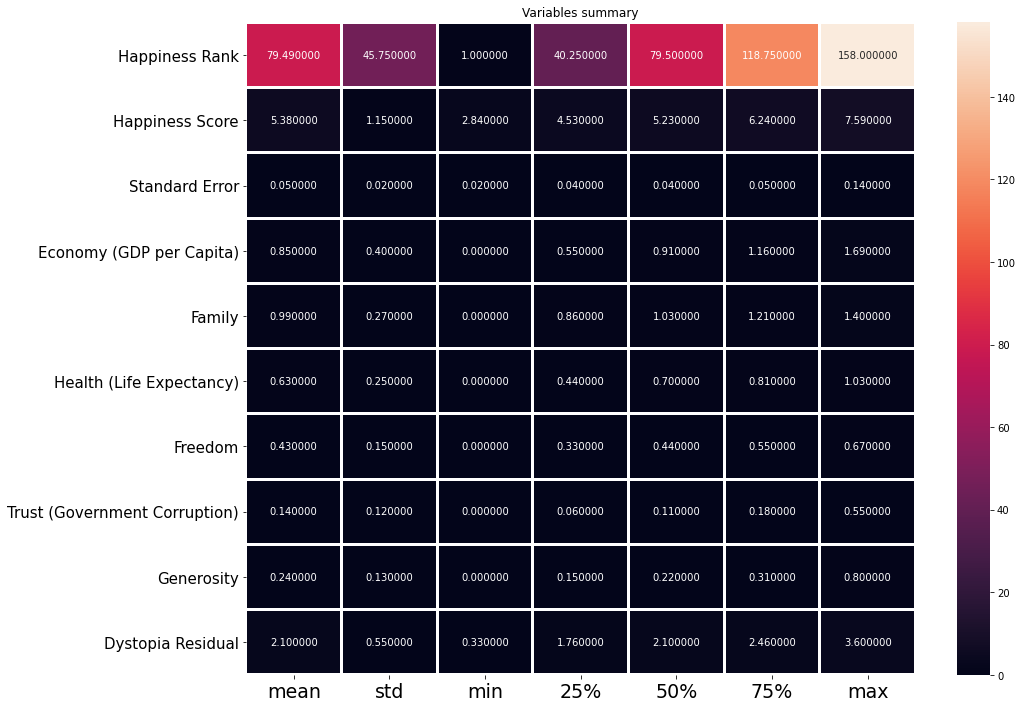

In [51]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=19)
plt.yticks(fontsize=15)
plt.title("Variables summary")
plt.show

Now I want to give a category to each country as High,Mid and Low according to their happiness scores.Thus we have to find out the bound in which these categories shall lie in.

In [54]:
print('max:',df['Happiness Score'].max())
print('min:',df['Happiness Score'].min())
add=df['Happiness Score'].max()-df['Happiness Score'].min()
grp=round(add/3,3)
print('range difference:',(grp))

max: 7.587
min: 2.839
range difference: 1.583


In [55]:
low=df['Happiness Score'].min()+grp
mid=low+grp

print('upper bound of Low grp',low)
print('upper bound of Mid grp',mid)
print('upper bound of High grp','max:',df['Happiness Score'].max())

upper bound of Low grp 4.422
upper bound of Mid grp 6.005
upper bound of High grp max: 7.587
